# <span style="color:green"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:red"><center>Introducción a la API Sequential de Keras</center></span>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

5. Oleg Jarma, ojarmam@unal.edu.co 
6. Laura Lizarazo, ljlizarazore@unal.edu.co 

## <span style="color:blue">Contenido</span> 

* [Introducción](#Introducción)
* [Prepara datos de MNIST](#Prepara-datos-de-MNIST)
* [Modelo Sequential de Keras](#Modelo-Sequential-de-Keras)
* [Summary y Plot Model](#Summary-y-Plot-Model)
* [Entrenamiento y evaluación del modelo](#Entrenamiento-y-evaluación-del-modelo)


## <span style="color:blue">Introducción</span>

Este es un notebook de Google Colaboratory. Los programas de Python se executan directamente en tu navegador,  una gran manera de aprender y utilizar TensorFlow. Para poder seguir este tutorial, ejecuta este notebook en Google Colab presionando el boton en la parte superior de esta pagina.


In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
print('Version de Tensorflow = ', tf.__version__)

Version de Tensorflow =  2.4.1


## <span style="color:blue">Prepara datos de MNIST</span> 

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

## <span style="color:blue">Modelo Sequential de Keras</span> 


In [3]:
import tensorflow.keras.layers as layer

model = tf.keras.models.Sequential([
    layer.Flatten(input_shape=(28,28)), #784
    layer.Dense(128, activation='relu'),
    layer.Dropout(0.2),
    layer.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## <span style="color:blue">Summary y Plot Model</span> 

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


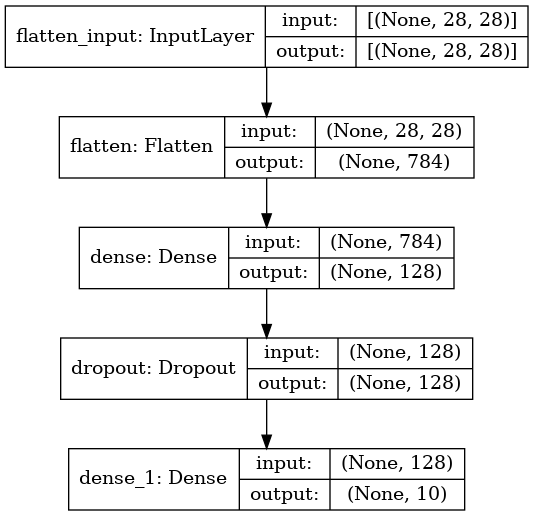

In [5]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='../Imagenes/mnist_dense.png', 
          show_shapes=True, show_dtype=False)

Puede necesitar instalar [graphviz](https://www.graphviz.org/).

In [ ]:
#from plot_model import plot_model
#plot_model(model)

## <span style="color:blue">Entrenamiento y evaluación del modelo</span> 

In [6]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4859 - accuracy: 0.8617
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1453 - accuracy: 0.9564
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1066 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0904 - accuracy: 0.9714
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0750 - accuracy: 0.9771


In [7]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 2s - loss: 0.0738 - accuracy: 0.9786


[0.07382926344871521, 0.978600025177002]

## <span style="color:blue">Primeros gráficos</span> 

### Extrae datos

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch 
hist

,loss,accuracy,epoch
0,0.293235,0.916267,0
1,0.140098,0.958250,1
2,0.105634,0.968300,2
3,0.088549,0.972383,3
4,0.076502,0.976267,4


### Pérdida

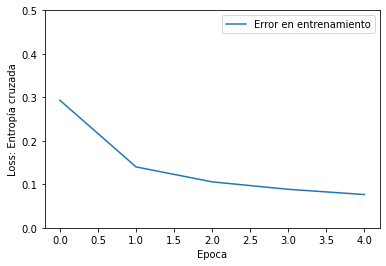

In [27]:

plt.figure()
plt.xlabel('Epoca')
plt.ylabel('Loss: Entropía cruzada')
plt.plot(hist['epoch'], hist['loss'],
           label='Error en entrenamiento')
plt.ylim([0,0.5])
plt.legend()
plt.show()

### Exactitud

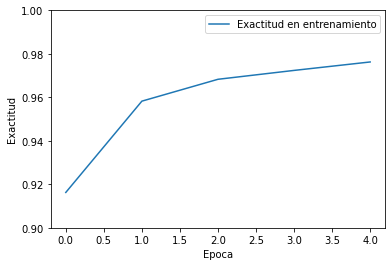

In [29]:

plt.figure()
plt.xlabel('Epoca')
plt.ylabel('Exactitud')
plt.plot(hist['epoch'], hist['accuracy'],
           label='Exactitud en entrenamiento')
plt.ylim([0.9,1])
plt.legend()
plt.show()